# importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_excel('corona/dataset.xlsx')
print(df.head)

<bound method NDFrame.head of            Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                

In [3]:
print(df.shape)

(5644, 111)


In [4]:
print(df.isnull().values.any())
print(df.isnull().values.any().mean())

True
1.0


In [5]:
df1 = df.loc[:, df.isnull().mean()<.9]
print(df1.shape)
print(df1.head())

(5644, 39)
        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                          

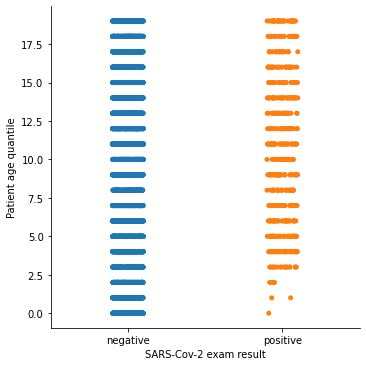

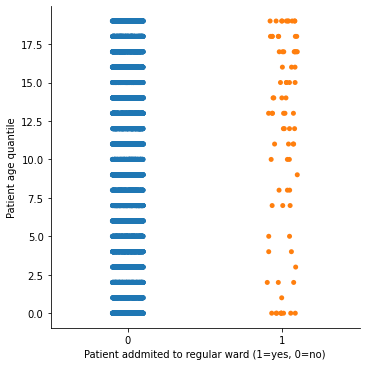

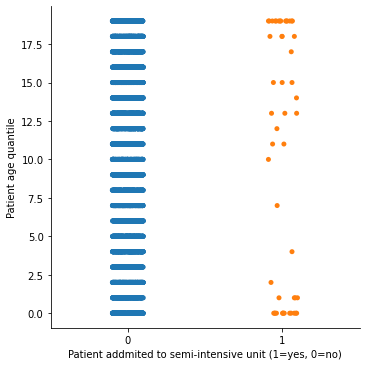

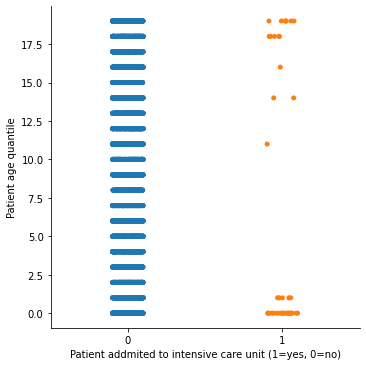

In [6]:
sns.catplot(x='SARS-Cov-2 exam result', y='Patient age quantile', data=df1)
sns.catplot(x='Patient addmited to regular ward (1=yes, 0=no)', y='Patient age quantile', data= df1)
sns.catplot(x='Patient addmited to semi-intensive unit (1=yes, 0=no)', y='Patient age quantile', data=df1)
sns.catplot(x='Patient addmited to intensive care unit (1=yes, 0=no)', y='Patient age quantile', data=df1)

In [7]:
features = df1.drop(['Patient ID', 'SARS-Cov-2 exam result', 'Basophils', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit', 'Platelets', 'Mean platelet volume ', 'Lymphocytes', 'Influenza B, rapid test'], axis=1)
print(features.head)
targets = df['SARS-Cov-2 exam result']
print(targets.shape)

<bound method NDFrame.head of       Patient age quantile  Hemoglobin  Red blood Cells  \
0                       13         NaN              NaN   
1                       17   -0.022340         0.102004   
2                        8         NaN              NaN   
3                        5         NaN              NaN   
4                       15         NaN              NaN   
...                    ...         ...              ...   
5639                     3         NaN              NaN   
5640                    17         NaN              NaN   
5641                     4         NaN              NaN   
5642                    10         NaN              NaN   
5643                    19    0.541564         0.578024   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
0                                                  NaN         NaN   
1                                            -0.950790   -0.094610   
2                                                  

# preprocessing

In [8]:
#replace the values nan by 0
features = features.fillna(0)
print(features.isnull().values.any())

False


In [9]:
#encoding
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector

encoderOrdinal = OrdinalEncoder()

transformColumn = make_column_transformer((encoderOrdinal, 
                                   make_column_selector(dtype_include=np.number)))
features = transformColumn.fit_transform(features)

encoderLabel = LabelEncoder()
targets = encoderLabel.fit_transform(targets)
print(features)
print(targets)

[[ 13.  47. 108. ...  99.  61.  19.]
 [ 17.  46. 114. ... 108.  74.  11.]
 [  8.  47. 108. ...  99.  61.  19.]
 ...
 [  4.  47. 108. ...  99.  61.  19.]
 [ 10.  47. 108. ...  99.  61.  19.]
 [ 19.  56. 141. ... 101.  82.  16.]]
[0 0 0 ... 0 0 1]


In [10]:
from sklearn.feature_selection import SelectKBest, chi2
chi2(features, targets)
select = SelectKBest(chi2, k=10)
select.fit_transform(features, targets)
print(select.get_support())

[ True  True  True  True  True  True  True  True  True  True]


In [11]:
#train test split
from sklearn.model_selection import train_test_split, learning_curve
fea_train, fea_test, tar_train, tar_test = train_test_split(features, targets, test_size=.2)
print(f'feature= {fea_train, fea_test}')
print(f'targets = {tar_train, tar_test}')

feature= (array([[ 14.,  47., 108., ...,  99.,  61.,  19.],
       [ 19.,  47., 108., ...,  99.,  61.,  19.],
       [  3.,  47., 108., ...,  99.,  61.,  19.],
       ...,
       [  7.,  47., 108., ...,  99.,  61.,  19.],
       [  2.,  47., 108., ...,  99.,  61.,  19.],
       [  7.,  47., 108., ...,  99.,  61.,  19.]]), array([[ 10.,  47., 108., ...,  99.,  61.,  19.],
       [ 10.,  47., 108., ...,  99.,  61.,  19.],
       [ 13.,  47., 108., ...,  99.,  61.,  19.],
       ...,
       [  6.,  47., 108., ...,  99.,  61.,  19.],
       [  1.,  47., 108., ...,  99.,  61.,  19.],
       [  2.,  47., 108., ...,  99.,  61.,  19.]]))
targets = (array([0, 1, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))


# modeling

In [12]:
#standardscaler and make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

#create variable for standardscaler
scaler = StandardScaler()
model = make_pipeline(scaler,
                      SVC())
model.fit(fea_train, tar_train)
evaluate = model.score(fea_test, tar_test)
print(evaluate)

0.9052258635961028


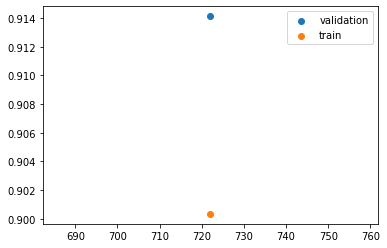

In [13]:
#leaningcurve
nbr, val_score, train_score = learning_curve(model, fea_train, tar_train, train_sizes=np.linspace(.2, 1., 1) )
plt.scatter(nbr, val_score.mean(), label='validation')
plt.scatter(nbr, train_score.mean(), label='train')
plt.legend()

In [14]:
#prediction
prediction = model.predict(fea_test[0:10])
print(prediction, tar_test[0:10])

[0 0 0 0 0 0 0 0 0 0] [0 0 0 0 1 0 0 0 0 0]


# optimisation

In [25]:
print(model)
params = {
    'svc__gamma': [1e-1, 1e-2],
    'svc__C': [1,10, 100, 1000],
}
print(model.get_params().keys())

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])
dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])


In [26]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, params, scoring='recall', cv=4)
grid.fit(fea_train, tar_train)
print(grid.best_params_)
predict = grid.predict(fea_test)
print(predict)

{'svc__C': 100, 'svc__gamma': 0.01}
[0 0 0 ... 0 0 0]


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(confusion_matrix(tar_test, predict))
print(classification_report(tar_test, predict))

[[1009   12]
 [ 102    6]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1021
           1       0.33      0.06      0.10       108

    accuracy                           0.90      1129
   macro avg       0.62      0.52      0.52      1129
weighted avg       0.85      0.90      0.87      1129

